<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Barplot-config" data-toc-modified-id="Barplot-config-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Barplot config</a></span></li><li><span><a href="#Load-data-set" data-toc-modified-id="Load-data-set-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Load data set</a></span></li></ul></li><li><span><a href="#IPA" data-toc-modified-id="IPA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IPA</a></span><ul class="toc-item"><li><span><a href="#Stats" data-toc-modified-id="Stats-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Stats</a></span></li></ul></li><li><span><a href="#Spelling" data-toc-modified-id="Spelling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Spelling</a></span><ul class="toc-item"><li><span><a href="#Words-with-[p]-,-[m]-,-[lh]-and-[nh]" data-toc-modified-id="Words-with-[p]-,-[m]-,-[lh]-and-[nh]-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Words with [p] , [m] , [lh] and [nh]</a></span></li><li><span><a href="#Free-diphtong-words" data-toc-modified-id="Free-diphtong-words-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Free diphtong words</a></span><ul class="toc-item"><li><span><a href="#Load-syllable-annotated-datasets" data-toc-modified-id="Load-syllable-annotated-datasets-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Load syllable annotated datasets</a></span></li></ul></li><li><span><a href="#[lh]-and-[nh]" data-toc-modified-id="[lh]-and-[nh]-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>[lh] and [nh]</a></span><ul class="toc-item"><li><span><a href="#vowels" data-toc-modified-id="vowels-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>vowels</a></span></li><li><span><a href="#contiguous-left" data-toc-modified-id="contiguous-left-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>contiguous left</a></span><ul class="toc-item"><li><span><a href="#Load-syllable-annotated-datasets" data-toc-modified-id="Load-syllable-annotated-datasets-2.3.2.1"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Load syllable annotated datasets</a></span></li></ul></li><li><span><a href="#position" data-toc-modified-id="position-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>position</a></span><ul class="toc-item"><li><span><a href="#Load-syllable-annotated-datasets" data-toc-modified-id="Load-syllable-annotated-datasets-2.3.3.1"><span class="toc-item-num">2.3.3.1&nbsp;&nbsp;</span>Load syllable annotated datasets</a></span></li></ul></li></ul></li><li><span><a href="#double-position" data-toc-modified-id="double-position-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>double position</a></span></li></ul></li></ul></div>

## Packages

In [1]:
import os
import re

import codecs
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import squarify 

import urllib
import ast
from collections import Counter
from ast import literal_eval
import io


## Barplot config

In [2]:
sns.set(color_codes=True)

def show_values_on_bars_v(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() - 0.01 + p.get_width() / 2.
            _y = p.get_y() + p.get_height() * 1.02
            value = '{:.3f}%'.format(p.get_height()*100)
            ax.text(_x, _y+0.3, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_h(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() #+ 0.4
            _y = p.get_y() + p.get_height()
            value = '{:.3f}%'.format(p.get_width()*100)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        

def show_values_on_bars_reg_v(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,y1 ,y2 + 8))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() - 0.01 + p.get_width() / 2.
            _y = p.get_y() + p.get_height() * 1.02
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y+0.3, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def show_values_on_bars_reg_h(axs):
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2+8,y1 ,y2))
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + 0.4
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Load data set

In [3]:
word_df = pd.read_csv('wikcionario_IPA.csv') 
word_df["spelling"] = word_df["spelling"].apply(eval)
word_df

,spelling,word
0,[ejʃseɾtuejʃeɾtu],excerto
1,[pɨ.lu.ʃɨ],peluche
2,[kõ.tɾi.bu.i.sɐw],contribuição
3,[al.gɐj],alguém
4,[kawʃ],caos
...,...,...
12369,[ku.pi.ɔ.zus],copiosos
12370,[ku.pi.ɔ.zas],copiosas
12371,[ku.pi.ɔ.za],copiosa
12372,[ʀi.ɐ.liʃ.ti.ko],realístico


# IPA

## Stats

In [4]:
pt_entries_IPA = list(word_df["spelling"])
pt_entries_IPA[0:10]

[['ejʃseɾtuejʃeɾtu'],
 ['pɨ.lu.ʃɨ'],
 ['kõ.tɾi.bu.i.sɐw'],
 ['al.gɐj'],
 ['kawʃ'],
 ['al.gu'],
 ['ɐ.nɐɾ.ki.ɐ'],
 ['sɨ.lɐj.ɾu'],
 ['kɐ.ɾi.ɔ.kɐ'],
 ['gɾa.tiʃ']]

In [5]:
pt_entries_IPA = list(word_df["spelling"])

pt_entries_IPA = [item for sublist in pt_entries_IPA for item in sublist]
pt_entries_IPA = [" ".join(list(str(i))) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("^", " ", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("$", " ", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("g ʷ", "gʷ", i) for i in pt_entries_IPA]
pt_entries_IPA = [re.sub("k ʷ", "kʷ", i) for i in pt_entries_IPA]
pt_entries_IPA[0:10]

[' e j ʃ s e ɾ t u e j ʃ e ɾ t u ',
 ' p ɨ . l u . ʃ ɨ ',
 ' k õ . t ɾ i . b u . i . s ɐ w ',
 ' a l . g ɐ j ',
 ' k a w ʃ ',
 ' a l . g u ',
 ' ɐ . n ɐ ɾ . k i . ɐ ',
 ' s ɨ . l ɐ j . ɾ u ',
 ' k ɐ . ɾ i . ɔ . k ɐ ',
 ' g ɾ a . t i ʃ ']

In [6]:
word_list_split = [i.split(" ") for i in pt_entries_IPA]
word_list_split = [item for sublist in word_list_split for item in sublist]
word_list_split = [x for x in word_list_split if x]
word_list_split[0:10]

['e', 'j', 'ʃ', 's', 'e', 'ɾ', 't', 'u', 'e', 'j']

In [7]:
counts = Counter(word_list_split)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ["IPA", "count"]
df = df.sort_values(by=["count"],ascending=False).reset_index(drop=True)
df

,IPA,count
0,.,30049
1,ɐ,10376
2,ɾ,8132
3,u,7926
4,i,7620
5,t,5546
6,a,4968
7,ɨ,4842
8,d,3741
9,l,3580


In [8]:
IPA_list = list(df["IPA"])
in_word_list = []
for word in IPA_list:
    word_search = " "+ word + " "
    matches = len([match for match in pt_entries_IPA if word_search in match])
    in_word_list.append(matches)
df["word_count"] = in_word_list
df

,IPA,count,word_count
0,.,30049,12152
1,ɐ,10376,7253
2,ɾ,8132,6709
3,u,7926,6374
4,i,7620,5896
5,t,5546,4854
6,a,4968,4760
7,ɨ,4842,4084
8,d,3741,3173
9,l,3580,3415


In [9]:
df.to_csv("wikcionario_IPA_stats.csv", index = False, header = True)

# Spelling

## Words with [p] , [m] , [lh] and [nh]

In [10]:
p_m_nh_lh_dipth_stats_list = []
p_m_nh_lh_dipth_stats_list.append(["word_all",len(word_df)])
print("total unique words: " + str(len(word_df)))

total unique words: 12374


In [11]:
word_p = word_df[word_df["word"].str.contains("p")]
p_m_nh_lh_dipth_stats_list.append(["word_p",len(word_p)])
word_p

,spelling,word
1,[pɨ.lu.ʃɨ],peluche
16,[puɾ.tu.geʃ],português
28,[ʒɐ.pu.neʃ],japonês
35,[tɾi.pli.kaɾ],triplicar
36,[kʷɐ.dɾu.pli.kaɾ],quadruplicar
...,...,...
12360,[iʃ.pɐ.ʀi.ɲaɾ],esparrinhar
12362,[puɾ.tẽ.tu],portento
12369,[ku.pi.ɔ.zus],copiosos
12370,[ku.pi.ɔ.zas],copiosas


In [12]:
m_list = "m[aáàâãeéèêiíìoóòôõuúù]"
word_m = word_df[word_df["word"].str.contains(m_list)]
p_m_nh_lh_dipth_stats_list.append(["word_m",len(word_m)])
word_m

,spelling,word
19,[i.ti.mu.lu.ʒi.ɐ],etimologia
34,[vi.ɛt.nɐ.mi.tɐ],vietnamita
42,[ɛ.ti.mu],étimo
44,[ɔ.mɔ.lu.gu],homólogo
45,[mɨ.di.ɛ.val],medieval
...,...,...
12348,[ɐ.gɾɐ.vɐ.mẽ.tu],agravamento
12350,[i.mu.dɨ.ɾa.du],imoderado
12354,[pɾi.e.mi.nẽ.si.ɐ],preeminência
12361,[muʃ.kɐ.tɛl],moscatel


In [13]:
word_lh = word_df[word_df["word"].str.contains("lh")]
p_m_nh_lh_dipth_stats_list.append(["word_lh",len(word_lh)])
word_lh

,spelling,word
79,[kɐʃ.tɨ.ʎɐ.nu],castelhano
165,[ẽ.pɨ.si.ʎu],empecilho
190,[vɨɾ.mɐj.ʎu],vermelho
202,[ɔɾ.gu.ʎo.zu],orgulhoso
294,[eɾ.vi.ʎɐ],ervilha
...,...,...
12279,[iʃ.pɐɾ.ti.ʎu],espartilho
12322,[ɐ.tɐ.bɐ.ʎwɐ.mẽ.tu],atabalhoamento
12325,[ʃu.kɐ.ʎaɾ],chocalhar
12358,[ẽ.ʒɨ.ʎa.du],engelhado


In [14]:
word_nh = word_df[word_df["word"].str.contains("nh")]
p_m_nh_lh_dipth_stats_list.append(["word_nh",len(word_nh)])
word_nh

,spelling,word
56,[ɐ.bɾu.ɲu],abrunho
117,[kɐ.ɲɐw],canhão
212,[su.ɲaɾ],sonhar
239,[kɐʃ.tɐ.ɲɐ],castanha
414,[ẽ.di.ɲɐj.ɾa.du],endinheirado
...,...,...
12175,[gɐ.ɲɐ.doɾ],ganhador
12190,[kɔ.vi.ɲɐ],covinha
12212,[ko.mɨ.zi.ɲu],comezinho
12336,[fɐ.ɾi.ɲẽ.tu],farinhento


In [15]:
p_m_nh_lh_dipth_stats = pd.DataFrame(p_m_nh_lh_dipth_stats_list, columns=["item","length"])
p_m_nh_lh_dipth_stats

,item,length
0,word_all,12374
1,word_p,2400
2,word_m,2364
3,word_lh,300
4,word_nh,207


In [16]:
max_total_words_length = p_m_nh_lh_dipth_stats["length"].max()

p_m_nh_lh_dipth_stats["length"] = p_m_nh_lh_dipth_stats["length"]/max_total_words_length
p_m_nh_lh_dipth_stats["length"] = p_m_nh_lh_dipth_stats["length"].round(5)
p_m_nh_lh_dipth_stats.drop(index=p_m_nh_lh_dipth_stats.index[0], axis=0, inplace=True)
p_m_nh_lh_dipth_stats

,item,length
1,word_p,0.19396
2,word_m,0.19105
3,word_lh,0.02424
4,word_nh,0.01673


[Text(0.5, 0, 'Count'), Text(0, 0.5, '')]

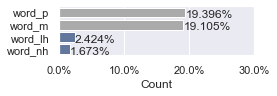

In [17]:
all_colors = {
    #'word_all': '#dddddd',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
    'word_lh': '#5975a4',
    'word_lh_clitic': '#5975a4',
    'word_nh': '#cc8963',
    'word_nh_diminutive': '#cc8963'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=p_m_nh_lh_dipth_stats)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(3.5, 0.9)
ax.set(xlabel="Count", ylabel="")

In [18]:
writer = pd.ExcelWriter("word_IPA_wikcionario_lh_nh.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

word_lh.to_excel(writer, index=False, sheet_name='word_lh')
word_nh.to_excel(writer, index=False, sheet_name='word_nh')

writer.save()

C:\Users\CARLOS~1\AppData\Local\Temp/ipykernel_5312/470412290.py:1: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  writer = pd.ExcelWriter("word_IPA_wikcionario_lh_nh.xlsx",


ModuleNotFoundError: No module named 'xlsxwriter'

## Free diphtong words

In [ ]:
dipht_free_ai = word_df[word_df["word"].str.contains("ai")]
dipht_free_ei = word_df[word_df["word"].str.contains("ei|éi")]
dipht_free_oi = word_df[word_df["word"].str.contains("oi|ói")]
dipht_free_ui = word_df[word_df["word"].str.contains("ui")]
dipht_free_ui = dipht_free_ui[~dipht_free_ui["word"].str.contains("gui|qui")]

In [ ]:
writer = pd.ExcelWriter("word_IPA_wikcionario_dipht_free.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

dipht_free_ai.to_excel(writer, index=False, sheet_name='dipht_free_ai')
dipht_free_ei.to_excel(writer, index=False, sheet_name='dipht_free_ei')
dipht_free_oi.to_excel(writer, index=False, sheet_name='dipht_free_oi')
dipht_free_ui.to_excel(writer, index=False, sheet_name='dipht_free_ui')

writer.save()

### Load syllable annotated datasets
Syllabifier from https://portulanclarin.net/workbench/lx-syllabifier/

Syllabifier included in new column of word_dicio_aberto_dipht_free.xlsx file copy sheets.

In [ ]:
dipht_free_list = []
dipht_free_ai = pd.read_excel("word_IPA_wikcionario_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_ai")
dipht_free_ai = dipht_free_ai[dipht_free_ai["Syllabifier"].str.contains("ai•|ai$")]
dipht_free_ai = len(dipht_free_ai)

dipht_free_ei = pd.read_excel("word_IPA_wikcionario_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_ei")
dipht_free_ei = dipht_free_ei[dipht_free_ei["Syllabifier"].str.contains("ei•|ei$")]
dipht_free_ei = len(dipht_free_ei)

dipht_free_oi = pd.read_excel("word_IPA_wikcionario_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_oi")
dipht_free_oi = dipht_free_oi[dipht_free_oi["Syllabifier"].str.contains("oi•|oi$")]

dipht_free_ou_or_oi = dipht_free_oi.copy()
dipht_free_ou_or_oi["word"] = dipht_free_oi["word"].replace(to_replace=r'oi', value='ou', regex=True)
dipht_free_ou = word_df[word_df["word"].str.contains("ou")]
dipht_free_ou_or_oi = dipht_free_ou_or_oi[["word","Syllabifier"]]
dipht_free_ou_or_oi = pd.merge(dipht_free_ou, dipht_free_ou_or_oi, how = "inner", indicator = False)
dipht_free_ou_or_oi = len(dipht_free_ou_or_oi)
dipht_free_oi = len(dipht_free_oi)

dipht_free_ui = pd.read_excel("word_IPA_wikcionario_dipht_free_with_syllabification.xlsx", sheet_name="dipht_free_ui")
dipht_free_ui = dipht_free_ui[dipht_free_ui["Syllabifier"].str.contains("ui•|ui$")]
#dipht_free_ui = dipht_free_ui[~dipht_free_ui["word"].str.contains("uim$|uir$")]
dipht_free_ui = len(dipht_free_ui)

dipht_free_list.append(["dipht_free_ai",dipht_free_ai])
dipht_free_list.append(["dipht_free_ei",dipht_free_ei])
dipht_free_list.append(["dipht_free_oi",dipht_free_oi])
dipht_free_list.append(["dipht_free_ou_or_oi",dipht_free_ou_or_oi])
dipht_free_list.append(["dipht_free_ui",dipht_free_ui])

dipht_free_df = pd.DataFrame(dipht_free_list, columns=["item","length"])
dipht_free_df

In [ ]:
dipht_free_df["length"] = dipht_free_df["length"]/max_total_words_length
dipht_free_df["length"] = dipht_free_df["length"].round(5)
dipht_free_df

In [ ]:
p_m_nh_lh_dipth_stats = p_m_nh_lh_dipth_stats.append(dipht_free_df)
p_m_nh_lh_dipth_stats = p_m_nh_lh_dipth_stats.reset_index(drop=True)
p_m_nh_lh_dipth_stats

In [ ]:
all_colors = {
    #'word_all': '#dddddd',
    'word_p': '#aaaaaa',
    'word_m': '#aaaaaa',
    'word_lh': '#5975a4',
    'word_nh': '#cc8963',
    'diph_free_ai': '#e6cbcb',
    'diph_free_ei': '#c49299',
    #'i': '#9f8097',
    'diph_free_oi': '#594772',
    'diph_free_oi_or_ui': '#594772',
    'diph_free_ui': '#21314e'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))
 
fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item", data=p_m_nh_lh_dipth_stats)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.set(xlim=(0, 0.3))
show_values_on_bars_h(ax)
fig.set_size_inches(5, 3.5)
ax.set(xlabel="Count", ylabel="")

## [lh] and [nh]

### vowels

In [ ]:
dipht_free_list = []
dipht_free_list.append(["a","_i",dipht_free_ai])
dipht_free_list.append(["e","_i",dipht_free_ei])
dipht_free_list.append(["i","_i",0])
dipht_free_list.append(["o","_i",dipht_free_oi])
dipht_free_list.append(["u","_i",dipht_free_ui])

dipht_free_df = pd.DataFrame(dipht_free_list, columns=["vowel","item","length"])
dipht_free_df

In [ ]:
palatal_vowel_list = []

left_a_lh = word_df[word_df["word"].str.contains("alh|álh|àlh|âlh")]
palatal_vowel_list.append(["a","_lh",len(left_a_lh)])
left_e_lh = word_df[word_df["word"].str.contains("elh|élh|èlh|êlh")]
palatal_vowel_list.append(["e","_lh",len(left_e_lh)])
left_i_lh = word_df[word_df["word"].str.contains("ilh|ílh|ìlh")]
palatal_vowel_list.append(["i","_lh",len(left_i_lh)])
left_o_lh = word_df[word_df["word"].str.contains("olh|ólh|òlh|ôlh")]
palatal_vowel_list.append(["o","_lh",len(left_o_lh)])
left_u_lh = word_df[word_df["word"].str.contains("ulh|úlh|ùlh")]
palatal_vowel_list.append(["u","_lh",len(left_u_lh)])

left_a_nh = word_df[word_df["word"].str.contains("anh|ánh|ành|ânh")]
palatal_vowel_list.append(["a","_nh",len(left_a_nh)])
left_e_nh = word_df[word_df["word"].str.contains("enh|énh|ènh|ênh")]
palatal_vowel_list.append(["e","_nh",len(left_e_nh)])
left_i_nh = word_df[word_df["word"].str.contains("inh|ính|ình")]
palatal_vowel_list.append(["i","_nh",len(left_i_nh)])
left_o_nh = word_df[word_df["word"].str.contains("onh|ónh|ònh|ônh")]
palatal_vowel_list.append(["o","_nh",len(left_o_nh)])
left_u_nh = word_df[word_df["word"].str.contains("unh|únh|ùnh")]
palatal_vowel_list.append(["u","_nh",len(left_u_nh)])

palatal_vowel_df = pd.DataFrame(palatal_vowel_list, columns=["vowel","item","length"])

palatal_vowel_df

In [ ]:
vowel_combo_df = pd.concat([dipht_free_df, palatal_vowel_df], axis= 0)
vowel_combo_df

In [ ]:
df_count = vowel_combo_df.groupby(['vowel','item']).sum().unstack()
df_count

In [ ]:
df_count = df_count
norm_df = (df_count)/(df_count.sum())*100
norm_df

In [ ]:
vowel_colors = {
    'a': '#e6cbcb',
    'e': '#c49299',
    'i': '#9f8097',
    'o': '#594772',
    'u': '#21314e'
}

vowel_order = list(vowel_colors.keys())


ax = norm_df.loc[reversed(vowel_order)].T.plot.bar(stacked=True,color = vowel_colors, figsize=(3,3), tick_label=['_i','_lh','_nh'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),bbox_to_anchor=(1.0, 1.0))
ax.set( xlabel="Items")
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xticklabels(list(norm_df['length']),rotation=0)



In [ ]:
palatal_vowel_df

In [ ]:
palatal_vowel_df["length"] = palatal_vowel_df["length"]/max_total_words_length
palatal_vowel_df["length"] = palatal_vowel_df["length"].round(5)
palatal_vowel_df

In [ ]:
all_colors = {
    'word_lh': '#5975a4',
    'word_nh': '#cc8963'
}

all_colors = list(all_colors.values())
sns.set_palette(sns.color_palette(all_colors))

palatal_vowel_df["item"] = palatal_vowel_df["item"].str.replace('_', '-') # handles don't support "_"

fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="vowel",hue="item" , data=palatal_vowel_df)
handles, labels = ax.get_legend_handles_labels()
ax.set(xlabel="Count", ylabel="Vowel")

ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
show_values_on_bars_h(ax)

fig.set_size_inches(6,3.75)

### contiguous left 

In [ ]:
constiguous_left_list = []

dipht_lh = "ailh|iulh|uilh|eulh|éulh|eilh|éilh|oilh|óilh|aulh|oulh"
dipht_nh = "ainh|iunh|uinh|eunh|éunh|einh|éinh|oinh|óinh|aunh|ounh"
nasal_vowel_lh = "nlh|nnh|ãlh"
nasal_vowel_nh = "ãnh|õlh|õnh"

left_nasal_vowel_lh = word_df[word_df["word"].str.contains(nasal_vowel_lh)]
constiguous_left_list.append(["left_nasal_vowel_lh",len(left_nasal_vowel_lh)])
left_dipht_lh = word_df[word_df["word"].str.contains(dipht_lh)]
left_dipht_lh = left_dipht_lh[~left_dipht_lh["word"].str.contains("guilh|quilh|guelh|quelh")]
constiguous_left_list.append(["left_dipht_lh",len(left_dipht_lh)])
left_rot_lh = word_df[word_df["word"].str.contains("rlh")]
constiguous_left_list.append(["left_rot_lh",len(left_rot_lh)])
left_lat_lh = word_df[word_df["word"].str.contains("llh")]
constiguous_left_list.append(["left_lat_lh",len(left_lat_lh)])


left_nasal_vowel_nh = word_df[word_df["word"].str.contains(nasal_vowel_nh)]
constiguous_left_list.append(["left_nasal_vowel_nh",len(left_nasal_vowel_nh)])
left_dipht_nh = word_df[word_df["word"].str.contains(dipht_nh)]
#print(left_dipht_nh)
left_dipht_nh = left_dipht_nh[~left_dipht_nh["word"].str.contains("guinh|quinh|guenh|quenh")]
constiguous_left_list.append(["left_dipht_nh",len(left_dipht_nh)])
left_rot_nh = word_df[word_df["word"].str.contains("rnh")]
constiguous_left_list.append(["left_rot_nh",len(left_rot_nh)])
left_lat_nh = word_df[word_df["word"].str.contains("lnh")]
constiguous_left_list.append(["left_lat_nh",len(left_lat_nh)])

constiguous_left_df = pd.DataFrame(constiguous_left_list, columns=["item","length"])
constiguous_left_df

In [ ]:
writer = pd.ExcelWriter("word_IPA_wikcionario_dipht_left_palatal.xlsx", 
                        engine='xlsxwriter', 
                        options={'encoding':'utf-8'}) 

left_dipht_lh.to_excel(writer, index=False, sheet_name='left_dipht_lh')
left_dipht_nh.to_excel(writer, index=False, sheet_name='left_dipht_nh')

writer.save()

#### Load syllable annotated datasets
Syllabifier from https://portulanclarin.net/workbench/lx-syllabifier/

Syllabifier included in new column of word_dicio_aberto_dipht_left_palatal.xlsx file copy sheets. Phonological notes column is human corrected.

In [ ]:
left_dipht_lh = pd.read_excel("word_IPA_wikcionario_dipht_left_palatal_with_syllabification.xlsx", sheet_name="left_dipht_lh")
left_dipht_lh = len(left_dipht_lh[left_dipht_lh["Syllabifier"].str.contains("ai•lh|ei•lh|oi•lh|ui•lh")])
left_dipht_nh = pd.read_excel("word_IPA_wikcionario_dipht_left_palatal_with_syllabification.xlsx", sheet_name="left_dipht_nh")
left_dipht_nh = len(left_dipht_nh[left_dipht_nh["Syllabifier"].str.contains("ai•nh|ei•nh|oi•nh|ui•nh")])
constiguous_left_df.loc[constiguous_left_df['item'] == 'left_dipht_lh', 'length'] = left_dipht_lh
constiguous_left_df.loc[constiguous_left_df['item'] == 'left_dipht_nh', 'length'] = left_dipht_nh
constiguous_left_df

In [ ]:
all_colors = {
    'word_lh': '#5975a4',
    'word_nh': '#cc8963'
}

all_colors = list(all_colors.values())
all_colors = list(np.repeat(all_colors,4))
sns.set_palette(sns.color_palette(all_colors))


fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=constiguous_left_df)
show_values_on_bars_h(ax)
fig.set_size_inches(7,3)
ax.set(xlabel="Count", ylabel="")
plt.xlim(0, 9)

### position

In [ ]:
initial_lh = word_df[word_df["word"].str.contains("^lh")]
#initial_lh = len(initial_lh)
initial_nh = word_df[word_df["word"].str.contains("^nh")]
#initial_nh = len(initial_nh)

In [ ]:
initial_lh

In [ ]:
initial_nh

In [ ]:
initial_list = []

initial_lh = len(initial_lh)
initial_nh = len(initial_nh)

initial_list.append(["initial_lh",initial_lh])
initial_list.append(["initial_nh",initial_nh])


df_initial = pd.DataFrame(initial_list, columns=["item","length"])
df_initial

#### Load syllable annotated datasets
Syllabifier from https://portulanclarin.net/workbench/lx-syllabifier/

Syllabifier included in new column of word_dicio_aberto_lh_nh.xlsx file copy sheets.

In [ ]:
word_lh = pd.read_excel("word_IPA_wikcionario_lh_nh_with_syllabification.xlsx", sheet_name="word_lh")
word_nh = pd.read_excel("word_IPA_wikcionario_lh_nh_with_syllabification.xlsx", sheet_name="word_nh")

In [ ]:
intermedial_list = []

intermedial_lh = word_lh[word_lh["Syllabifier"].str.contains("•lh[^•]+•")]
not_intermedial_lh = word_lh[word_lh["Syllabifier"].str.contains("•lh([^•])+-•se$")]
intermedial_lh = len(intermedial_lh) - len(not_intermedial_lh)

intermedial_nh = word_nh[word_nh["Syllabifier"].str.contains("•nh[^•]+•")]
not_intermedial_nh = word_nh[word_nh["Syllabifier"].str.contains("•nh([^•])+-•se$")]
intermedial_nh = len(intermedial_nh) - len(not_intermedial_nh)

intermedial_list.append(["intermedial_lh",intermedial_lh])
intermedial_list.append(["intermedial_nh",intermedial_nh])

df_intermedial = pd.DataFrame(intermedial_list, columns=["item","length"])
df_intermedial

In [ ]:
final_list = []

final_lh = word_lh[word_lh["Syllabifier"].str.contains("•lh([^•])+$|•lh([^•])+-•se$")]
final_lh = len(final_lh)

final_nh = word_nh[word_nh["Syllabifier"].str.contains("•nh([^•])+$|•nh([^•])+-•se$")]
final_nh = len(final_nh)

final_list.append(["final_lh",final_lh])
final_list.append(["final_nh",final_nh])

df_final = pd.DataFrame(final_list, columns=["item","length"])
df_final

In [ ]:
df = pd.concat([df_initial, df_intermedial, df_final], axis= 0)
df

In [ ]:
df["length"] = df["length"]/max_total_words_length
df["length"] = df["length"].round(5)
df

In [ ]:
all_colors = {
    'word_lh': '#5975a4',
    'word_nh': '#cc8963'
}

all_colors = list(all_colors.values())
all_colors = all_colors*3
sns.set_palette(sns.color_palette(all_colors))
 

fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=df)

ax.xaxis.set_major_formatter(ticker.PercentFormatter(1))
show_values_on_bars_h(ax)

fig.set_size_inches(3.5,1.75)

ax.set(xlabel="Count", ylabel="")

## double position

In [ ]:
double_nh = word_df[word_df["word"].str.contains(".*nh.*nh.*")]
double_nh = double_nh[~double_nh["word"].str.contains("\-")]

double_nh_no_inho_a = double_nh[~double_nh["word"].str.contains("inho$|inha$")]

double_lh = word_df[word_df["word"].str.contains(".*lh.*lh.*")]
double_lh = double_lh[~double_lh["word"].str.contains("\-")]

double_list = []
double_nh = len(double_nh)
double_nh_no_inho_a = len(double_nh_no_inho_a)
double_lh = len(double_lh)

double_list.append(["double_lh",double_lh])
double_list.append(["double_nh",double_nh])
double_list.append(["double_nh_no_inho_a",double_nh_no_inho_a])

df_double = pd.DataFrame(double_list, columns=["item","length"])
df_double

In [ ]:
all_colors = ['#5975a4','#cc8963','#cc8963']
sns.set_palette(sns.color_palette(all_colors))

fig, ax = plt.subplots()
ax = sns.barplot(x="length", y="item" , data=df_double)
show_values_on_bars_reg_h(ax)
fig.set_size_inches(10,1.3)
ax.set(xlabel="Count", ylabel="")